In [46]:
from matplotlib import pyplot as plt
from os import path
import pandas as pd
import datetime
import io, os, sys, types
import import_ipynb

from ReadGitTimestamps import history_df

In [59]:
df_1 = history_df()
print(df_1)


                   date         day      hour  nb_commits
0   2024-03-28 15:10:04  2024-03-28  15:10:04           1
1   2024-03-28 14:57:30  2024-03-28  14:57:30           1
2   2024-03-28 14:56:17  2024-03-28  14:56:17           1
3   2024-03-28 14:51:43  2024-03-28  14:51:43           1
4   2024-03-28 10:08:11  2024-03-28  10:08:11           1
..                  ...         ...       ...         ...
679 2022-07-18 13:22:36  2022-07-18  13:22:36           1
680 2022-07-18 13:20:48  2022-07-18  13:20:48           1
681 2022-07-18 12:23:33  2022-07-18  12:23:33           1
682 2022-07-18 12:43:06  2022-07-18  12:43:06           1
683 2022-07-18 12:12:15  2022-07-18  12:12:15           1

[684 rows x 4 columns]


In [64]:
df_2 = df_1.copy()

df_3 = df_2.groupby("day").date.agg(["min", "max"])
df_4 = df_3.copy()


df_4["duration"] = df_4.apply(lambda x: x["max"] - x["min"], axis=1)
df_4["duration_hour"] = df_4.apply(lambda x: f"{x['duration'].seconds/3600:.02f}", axis=1)
df_5 = df_4["duration_hour"].truncate(before="2023-09-01")
# print(df_5)
# df_5 = df_4["duration_hour"].copy()
df_5.index = pd.to_datetime(df_5.index)
new_index = pd.date_range(start=df_5.index[0], end=df_5.index[-1])
df_6 = df_5.reindex(new_index)
df_7=df_6.apply(lambda x:float(x))


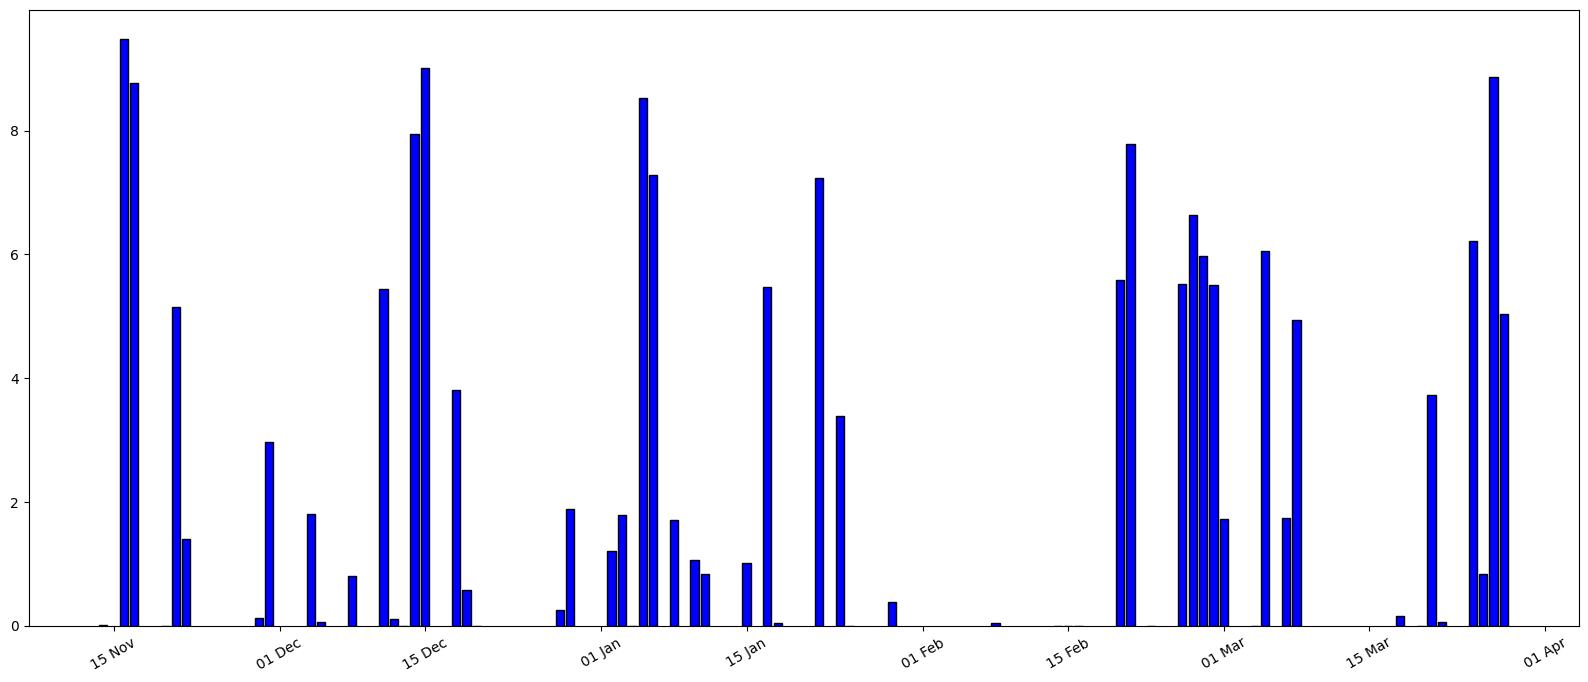

In [66]:
import matplotlib.dates as mdates

fig, ax1  = plt.subplots(1, figsize=(20,8))


ax1.tick_params(axis='x', labelsize=10, rotation=30)
date_format = '%d %b'
ax1.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
bar_container = ax1.bar(df_7.index,df_7 , color="blue", width=0.8, edgecolor="black")



